322. Coin Change

You are given an integer array coins representing coins of different denominations and an integer amount representing a total amount of money.

Return the fewest number of coins that you need to make up that amount. If that amount of money cannot be made up by any combination of the coins, return -1.

You may assume that you have an infinite number of each kind of coin.

 

Example 1:

Input: coins = [1,2,5], amount = 11
Output: 3
Explanation: 11 = 5 + 5 + 1
Example 2:

Input: coins = [2], amount = 3
Output: -1
Example 3:

Input: coins = [1], amount = 0
Output: 0
 

Constraints:

1 <= coins.length <= 12
1 <= coins[i] <= 231 - 1
0 <= amount <= 104

In [20]:
class Solution(object):
    def coinChange(self, coins, amount):
        """
        :type coins: List[int]
        :type amount: int
        :rtype: int
        """
        coins.sort(reverse = True)
        res = []
        def helper(i,CurSum,CurLst,target):
            
            if i >= len(coins) or CurSum > target:
                return
            
            if CurSum == target:
                res.append(CurLst[:])
                return

            helper(i,CurSum+coins[i],CurLst+[coins[i]],target)

            helper(i+1,CurSum,CurLst,target)
        helper(0,0,[],amount)
        print(res)
        return len(min(res,key=lambda e:len(e))) if res else -1
        
        
coins = [186,419,83,408]
amount = 6249
Solution().coinChange(coins,amount)

[[419, 419, 419, 419, 419, 419, 419, 419, 408, 408, 408, 408, 186, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83], [419, 419, 419, 419, 419, 419, 419, 408, 408, 408, 186, 186, 186, 186, 186, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83], [419, 419, 419, 419, 419, 419, 408, 408, 186, 186, 186, 186, 186, 186, 186, 186, 186, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83], [419, 419, 419, 419, 419, 419, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83], [419, 419, 419, 419, 419, 408, 408, 408, 408, 408, 408, 408, 408, 186, 186, 186, 83, 83, 83, 83], [419, 419, 419, 419, 419, 408, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 186, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83, 83], [419, 419, 419, 419, 408, 408, 408, 408, 408, 408, 408, 186, 186, 186, 186, 186, 186, 186, 83, 83, 83, 83, 83], [419, 419, 419, 4

20

In [20]:
class Solution(object):
    def coinChange(self, coins, amount):
        """
        :type coins: List[int]
        :type amount: int
        :rtype: int
        """
        res = []
        memo = {}
        def helper(i,CurSum,CurLst,target):

            if (i,CurSum) in memo:
                return memo[(i,CurSum)]
            
            if i >= len(coins) or CurSum > target:
                memo[(i,CurSum)] = 0
                return 0
            
            if CurSum == target:
                memo[(i,CurSum)] = 1
                return 1 

            helper(i,CurSum+coins[i],CurLst+[coins[i]],target)

            helper(i+1,CurSum,CurLst,target)
            
        helper(0,0,[],amount)
        return len(min(res,key=lambda e:len(e))) if res else -1
        
        
coins = [1]
amount = 0
Solution().coinChange(coins,amount)

-1

In [ ]:
class Solution:
    def coinChange(self, coins, amount) -> int:
        
        dp = [amount+1]*(amount+1)
        dp[0] = 0

        for a in range(1,amount+1):
            for coin in coins:
                if (a - coin) >= 0:
                    dp[a] = min(dp[a],1+dp[a-coin])

        return dp[amount] if dp[amount] != amount+1 else -1
    
coins = [1,2,5]
amount = 11
Solution().coinChange(coins,amount)

3

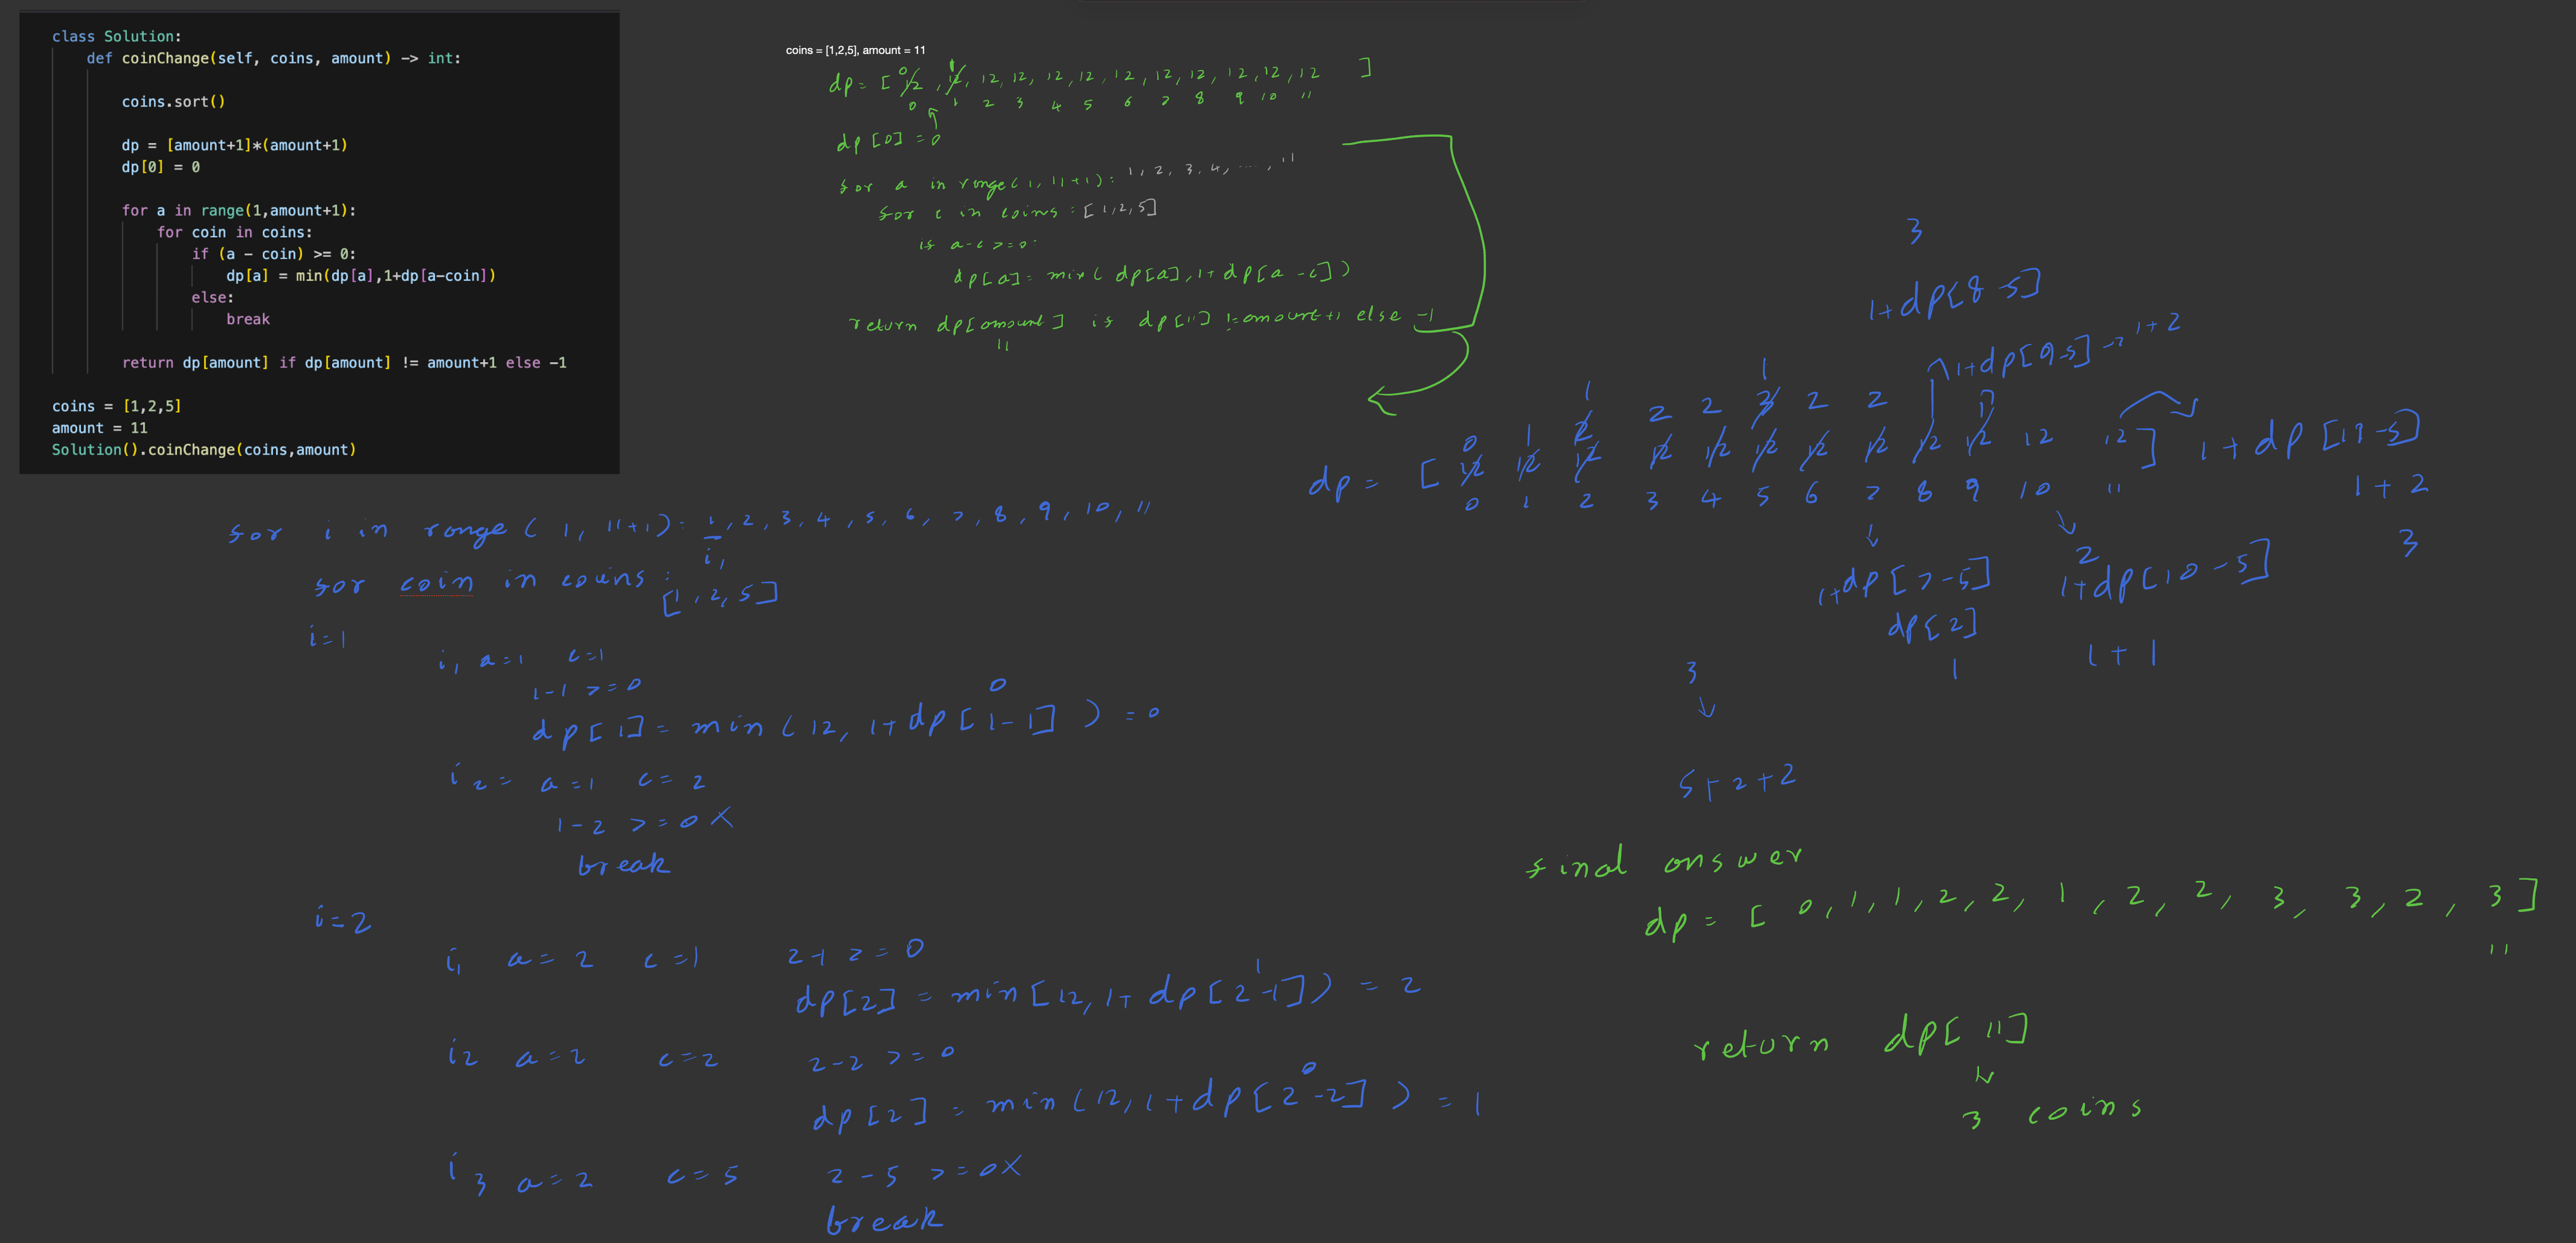

In [ ]:
"""
Intuition:- the intuition here is to form a dp table where each index represents an amount and number of coins required to form the amount, if the amount could not be formed
the the index's value remains amount +1

we are sorting the coins initially, so the moment we see amount - coin >= 0 (if (a - coin) >= 0:) fails, it means that the coin is greater than the amount to be formed and all the upcoming coins will greater than or equal to 
curren tcoin (since we sorted the coins initially), we are safe to break and check for next amount

dp[a] = min(dp[a],1+dp[a-coin])
in this line we are using greedly choosing lesser amount of coin to form the same amount 
if current amount - coin is >= 0 than it is exactly equal to current amount or remaing coin is required, we can check the number of coins requird to form the remaining amount from the dp table with dp[curren tamount - curren coin]

dp[curr amount] = min(dp[curr amount],(curr coin count) 1 + dp[curr amount - curr coin] (no of coin required to form the remqining amount))

"""

In [12]:
class Solution:
    def coinChange(self, coins, amount) -> int:

        coins.sort()
        
        dp = [amount+1]*(amount+1)
        dp[0] = 0

        for a in range(1,amount+1):
            for coin in coins:
                if (a - coin) >= 0:
                    dp[a] = min(dp[a],1+dp[a-coin])
                else:
                    break

        return dp[amount] if dp[amount] != amount+1 else -1
    
coins = [1,2,5]
amount = 11
Solution().coinChange(coins,amount)

3